In [4]:
import pathlib
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

analysis_dir = pathlib.Path('.')

In [5]:
def get_timing(filename: os.PathLike) -> pd.DataFrame:
    df = pd.read_json(filename)
    df['algo'] = df.algo.map({3: 'SOR', 4: 'CG', 0: 'LUP'})
    df['algo'] = df.algo.astype('category')
    return df


def plot_iterations(df, ax):
    ax = sns.pointplot(
        data=df,
        x="n", y=('iterations'), hue="algo", errorbar=('pi'),
        marker='s',
        native_scale=True,
        log_scale=True,
        ax=ax
    )
    
    ax.set_title('Iterations')
    ax.set_ylabel('time, s')
    ax.set_xlabel('Rank, n')
    # ax.set_xscale('log')
    return ax


def plot_timing(df, ax):
    ax = sns.pointplot(
        data=df,
        x="n", y=('time'), hue="algo", errorbar=('pi'),
        marker='s',
        native_scale=True,
        log_scale=True,
        ax=ax
    )

    ax.set_title('Timing')
    ax.set_ylabel('time, s')
    ax.set_xlabel('Rank, n')
    return ax

/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


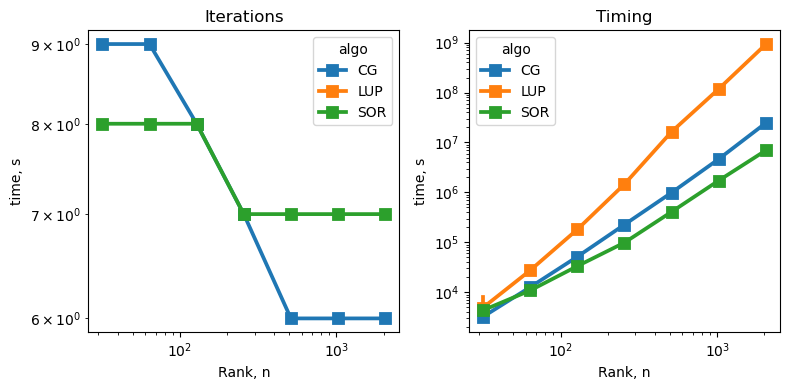

In [6]:
df_rand = get_timing(analysis_dir / 'timing_random.json')

fig, axes = plt.subplots(1, 2, layout='tight', figsize=(8, 4))
plot_iterations(df_rand, ax=axes[0])
plot_timing(df_rand, ax=axes[1])

plt.savefig('iters_rand.pdf', dpi=300)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


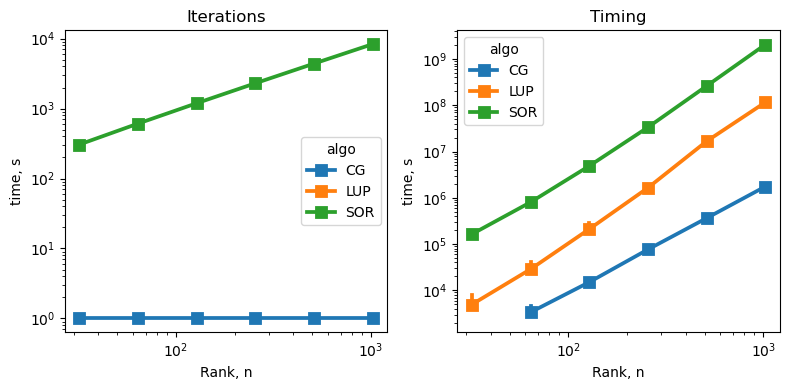

In [7]:
df = get_timing(analysis_dir / 'timing_custom.json')

fig, axes = plt.subplots(1, 2, layout='tight', figsize=(8, 4))
plot_iterations(df, ax=axes[0])
plot_timing(df, ax=axes[1])

plt.savefig('iters_cust.pdf', dpi=300)
plt.show()